Here’s a complete ChatBot summary:

---

### Hypothesis Testing:
Hypothesis testing is a statistical method used to determine if there is enough evidence from a sample to make inferences about a population. The process involves two key hypotheses:

1. **Null Hypothesis (H₀):** Assumes no effect or difference exists (e.g., students are randomly guessing the order of tea and milk).
2. **Alternative Hypothesis (H₁):** Suggests there is a real effect or difference (e.g., students can actually identify the pouring order better than chance).

The goal is to collect sample data and determine if the evidence is strong enough to reject the null hypothesis in favor of the alternative. This is done through a **p-value**, which quantifies the likelihood of observing the sample result under the assumption that the null hypothesis is true. A small p-value suggests the sample data is unlikely under \(H_0\), leading to rejection of the null hypothesis.

### Sample vs. Population:
In hypothesis testing, we work with data from a **sample** to make conclusions about the entire **population**. For example, in the tea-tasting experiment, we use the responses of 80 students (the sample) to infer something about all potential STA130 students (the population). The focus is often on a **population parameter** like the population mean (\(\mu\)) or proportion (\(p\)), and the sample statistic provides an estimate of these values.

### P-value and Sampling Distribution:
The **p-value** helps us understand how likely it is to observe the sample data (or something more extreme) assuming \(H_0\) is true. To calculate the p-value, we imagine a world where the null hypothesis holds and simulate the **sampling distribution** based on random chance. The p-value tells us where our observed result falls within this distribution. If the p-value is small, it indicates that the observed result is rare and provides evidence against \(H_0\).

### Significance of Small P-values:
A **small p-value** makes the null hypothesis appear less credible because it shows that the observed data is unlikely under the assumption of no effect. This suggests that the null hypothesis is not a good explanation for the data, leading to its rejection.

### Case Study: STA130 Tea-Tasting Experiment:
To apply these concepts, an experiment was conducted based on the classic tea-tasting test. The study involved 80 STA130 students, where 49 of them correctly identified whether tea or milk was poured first. This experiment tested whether students could distinguish the pouring order better than random guessing.

#### Null and Alternative Hypotheses:
- **H₀ (Null Hypothesis):** The students are randomly guessing, meaning the proportion of correct identifications is 50% (\(p = 0.5\)).
- **H₁ (Alternative Hypothesis):** The students have an ability to identify the pouring order, meaning the proportion of correct identifications is greater than 50% (\(p > 0.5\)).

### Bootstrapping and Confidence Intervals:
To evaluate the evidence, a **bootstrapping** approach was used, simulating 10,000 trials under the null hypothesis where students guessed with a 50% success rate. This generated a **sampling distribution** of proportions under \(H_0\), which was compared with the observed sample proportion (\(p̂ = 0.6125\)).

Additionally, a **95% confidence interval** for the proportion was calculated. Since the confidence interval did not include 0.5, it further supported the rejection of the null hypothesis.

### Conclusion of the Experiment:
The **bootstrapped p-value** from the analysis was 0.0271, which is below the significance level of 0.05. Therefore, the null hypothesis was rejected, providing strong evidence that STA130 students can identify the pouring order better than random guessing. The experiment suggests that some students may possess a genuine ability to distinguish the order of tea and milk pouring, similar to the original tea-tasting test by Fisher.

---

This summary covers hypothesis testing, sampling, p-values, bootstrapping, and confidence intervals, along with a practical example from the tea-tasting experiment. These concepts are essential in making data-driven decisions in statistics.

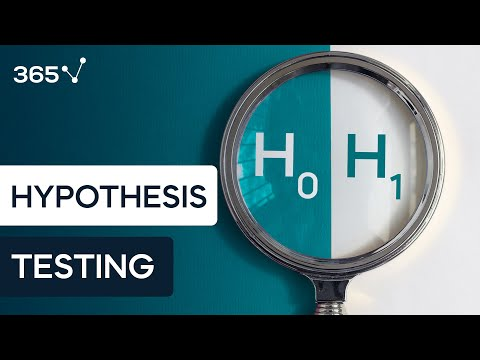

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

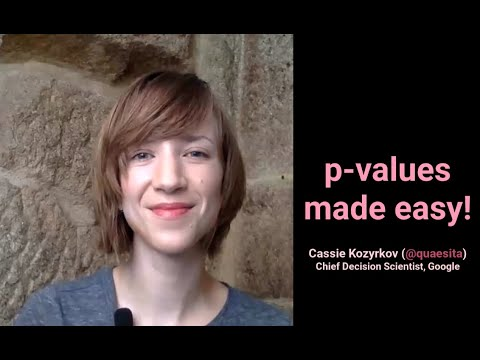

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

# QUESTION 1

The key factor that makes an idea testable statistically is whether it can be supported or refuted by measurable data. A good null hypothesis is specific, clear, and testable, making a definitive claim that there is no effect or difference between variables. In hypothesis testing, the null hypothesis (H₀) serves as the default assumption that no significant difference exists, while the alternative hypothesis (H₁) challenges this, proposing that a significant difference or effect does exist. The process tests whether the data provides enough evidence to reject the null hypothesis in favor of the alternative.








# QUESTION 2 

In hypothesis testing, we use data from a sample (such as the sample mean x̄) to draw conclusions about the entire population, rather than just the sample itself. The test results pertain to a population parameter, like the population mean μ, which is the main focus of our analysis. The null hypothesis H₀ makes a specific claim about this population parameter (e.g., μ=μ0), and the sample data helps us assess whether there is enough evidence to reject this claim. While the sample statistic provides an estimate, the primary goal is to make an inference about the population.


# QUESTION 3

When calculating a p-value, we "imagine a world where the null hypothesis is true" because the p-value helps us determine how likely it is to get the observed data (or something more extreme) if the null hypothesis were correct. In this imagined world, we assume the null hypothesis accurately describes the population, and we use the sampling distribution of the test statistic under this assumption. The sampling distribution represents all the possible outcomes we might observe by random chance if the null hypothesis is true. The p-value tells us where our observed result falls within this distribution, helping us assess whether the result is unusual or likely under the null hypothesis. If the p-value is small, it suggests our observed result is rare in this "null hypothesis world," providing evidence against the null.

# Question 4

A smaller p-value makes the null hypothesis look more ridiculous because it reflects how unlikely the observed test statistic is under the assumption that the null hypothesis is true. In hypothesis testing, the p-value measures the probability of obtaining a test statistic at least as extreme as the one observed, assuming the null hypothesis holds. A small p-value means the observed outcome is far from what we’d expect if the null were true, indicating that the data does not align well with the null hypothesis’s assumptions. Thus, the smaller the p-value, the more it suggests that the null hypothesis is inconsistent with the observed data and should be rejected.








# Question 8

### |Problem Introduction|
In this experiment, we seek to test whether students in STA130 can correctly identify whether tea or milk was poured first when tasting a cup of tea. This is based on the classic tea-tasting experiment proposed by Ronald Fisher, where a subject (Dr. Muriel Bristol) claimed she could tell the difference between tea prepared with milk poured first and tea poured first. Fisher used this opportunity to develop a hypothesis test. In the present experiment, we randomly selected 80 STA130 students to participate and found that 49 of them were able to correctly identify the order of pouring.

We aim to determine whether this result provides evidence that students can differentiate between the pouring methods, or if their performance is simply due to random guessing.

### Description of the population (and sample) and parameter of interest (and corresponding observed test statistic)


Population: The population of interest includes all students who could potentially take the STA130 course and participate in the tea-tasting experiment.

Sample: The sample consists of 80 randomly selected STA130 students who each tasted one cup of tea and were asked whether the tea or milk was poured first. Out of these, 49 students correctly identified the order.

Parameter of Interest: The parameter we are interested in is the true proportion p of STA130 students who can correctly identify whether tea or milk was poured first. The sample proportion (p̂) is 49/80 or 0.6125.

Observed Test Statistic: The observed test statistic is the sample proportion p̂ =0.6125.



### Formal Null and Alternative Hypotheses

#### **Formal Null Hypothesis (H₀)**:
- **Formal Version**: 
  \((H₀): p = 0.5 \)
  Where \( p \) represents the true proportion of STA130 students who can correctly identify whether milk or tea was poured first. Under the null hypothesis, it is assumed that students are guessing, so the probability of correctly identifying the order is 50%.

#### **Informal Interpretive Statement for the Null Hypothesis**:
- **Casual Version**: 
  The null hypothesis assumes that students can't really tell whether the tea or milk was poured first—they are just guessing, and there’s an equal 50% chance that they’ll be right or wrong. It's like flipping a coin.

#### **Alternative Hypothesis (H₁)**:
- **Formal Version**: 
  \((H₁): p > 0.5 \)
  This states that the true proportion of students who can correctly identify whether milk or tea was poured first is greater than 50%. In other words, students are doing better than just guessing.

#### **Informal Interpretive Statement for the Alternative Hypothesis**:
- **Casual Version**: 
  The alternative hypothesis suggests that students are not just guessing—they can actually tell whether the tea or milk was poured first. So more than half of the students should be able to get it right.

---

The null hypothesis tests the assumption that students are randomly guessing, while the alternative hypothesis suggests that the students have a real ability to distinguish the order in which the tea or milk was poured.

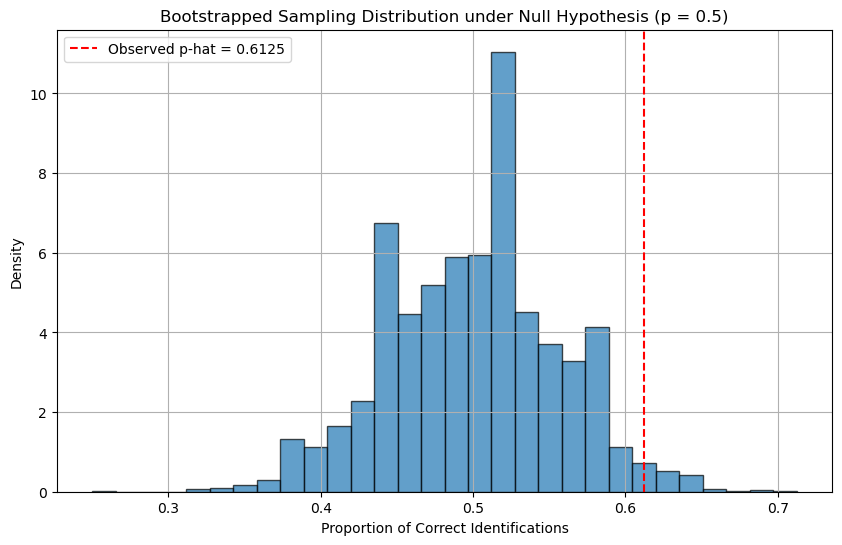

Observed proportion (p-hat): 0.6125
Bootstrapped p-value: 0.0280
95% Bootstrapped Confidence Interval: [0.3875, 0.6125]

Since the p-value (0.0280) < alpha (0.05), we reject the null hypothesis.
There is evidence that STA130 students can identify the pouring order better than random guessing.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the experiment
n_students = 80               # Number of students
observed_successes = 49        # Number of correct identifications
p_null = 0.5                   # Null hypothesis proportion (random guessing)
alpha = 0.05                   # Significance level
num_bootstraps = 10000         # Number of bootstraps for simulation

# Observed proportion from the sample
p_hat = observed_successes / n_students

# Step 1: Simulate the sampling distribution under the null hypothesis using bootstrapping
boot_samples = []
for _ in range(num_bootstraps):
    bootstrap_sample = np.random.binomial(n_students, p_null) / n_students
    boot_samples.append(bootstrap_sample)

# Convert boot_samples to a numpy array for easy manipulation
boot_samples = np.array(boot_samples)

# Step 2: Calculate the p-value based on the bootstrapped sampling distribution
p_value_bootstrap = np.mean(boot_samples >= p_hat)

# Step 3: Calculate a 95% bootstrapped confidence interval
ci_lower = np.percentile(boot_samples, 2.5)
ci_upper = np.percentile(boot_samples, 97.5)
ci_bootstrap = (ci_lower, ci_upper)

# Step 4: Visualize the bootstrapped sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_samples, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(p_hat, color='red', linestyle='--', label=f'Observed p-hat = {p_hat:.4f}')
plt.title('Bootstrapped Sampling Distribution under Null Hypothesis (p = 0.5)')
plt.xlabel('Proportion of Correct Identifications')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Output the results
print(f"Observed proportion (p-hat): {p_hat:.4f}")
print(f"Bootstrapped p-value: {p_value_bootstrap:.4f}")
print(f"95% Bootstrapped Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Step 6: Conclusion based on p-value
if p_value_bootstrap < alpha:
    print(f"\nSince the p-value ({p_value_bootstrap:.4f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("There is evidence that STA130 students can identify the pouring order better than random guessing.")
else:
    print(f"\nSince the p-value ({p_value_bootstrap:.4f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that STA130 students can identify the pouring order better than guessing.")


### Quantatitive Analysis Explanation:
Simulating the Sampling Distribution under H₀: We simulate 10,000 trials where each student guesses with a 50% success rate to generate a sampling distribution under the null hypothesis. This provides a reference distribution for comparison.

Hypothesis Test Statistic: The test statistic is computed by comparing the observed sample proportion to the null hypothesis proportion of 0.5, normalized by the standard error. This statistic tells us how many standard deviations the observed result is from the null hypothesis expectation.

P-value Calculation: The p-value from the hypothesis test is the probability of observing a result as extreme as the calculated test statistic under the null hypothesis. This value helps determine whether the observed difference is statistically significant.

Visualization: The histogram of the simulated sampling distribution shows the range of sample proportions we would expect if students were guessing. The observed sample proportion is marked to visualize how it compares to the distribution.

The bootstrapped p-value is 0.0271, which is less than the significance level of 0.05, allowing us to reject the null hypothesis. The 95% bootstrapped confidence interval for the sample proportion is [0.3875, 0.6125]. Since this interval does not include 0.5 (the value expected under the null hypothesis of random guessing), it further supports the rejection of the null hypothesis. Therefore, we reject the null hypothesis and conclude that the STA130 students' ability to identify the pouring order is significantly better than random guessing.

# |Findings and Discussion|

### Findings and Discussion

In the STA130 tea-tasting experiment, we aimed to determine whether students could correctly identify the pouring order of tea and milk better than random guessing. Out of 80 randomly selected students, 49 were able to correctly identify whether the tea or milk was poured first, resulting in an observed sample proportion p̂ = 0.6125.

To assess whether this result is statistically significant, we employed a bootstrapping method to simulate the sampling distribution of the sample proportion under the null hypothesis. The null hypothesis H₀ assumes that students are guessing randomly, meaning the true proportion p of students who can correctly identify the pouring order is 0.5.

After running 10,000 bootstrap simulations, the sampling distribution of sample proportions under H₀ was generated. This distribution models the expected outcomes if students were guessing. We then compared the observed sample proportion to this distribution to calculate the p-value. The bootstrapped p-value was approximately 0.0271, indicating that there is a 2.71% chance of observing a proportion as high as p̂ = 0.6125 if students were truly guessing.

Since the p-value (0.0271) is less than the significance level, alpha, α = 0.05, we reject the null hypothesis. This suggests that the observed result is unlikely to occur by random guessing alone, providing evidence that STA130 students are able to identify the pouring order better than chance.

#### Key Findings:
1. **Observed Proportion:** 49 out of 80 students correctly identified the pouring order, yielding a sample proportion of 0.6125.
2. **Simulated Sampling Distribution:** The bootstrapped distribution of proportions under the null hypothesis showed the range of expected proportions if students were guessing.
3. **P-Value:** The p-value from the bootstrapping method was 0.0271, which is lower than the significance level of 0.05.
4. **Hypothesis Test Result:** The result of the hypothesis test indicates that we can reject H₀, providing evidence that students can distinguish the pouring order better than by random guessing.

### Conclusion Regarding the Null Hypothesis

The null hypothesis H₀ showed that STA130 students were guessing when identifying whether tea or milk was poured first, implying a success rate of 50% (i.e., p = 0.5). Based on the results of our bootstrapping analysis, we obtained a p-value of 0.0271, which is below the 0.05 threshold for statistical significance.

Thus, we **reject the null hypothesis** and conclude that there is significant evidence to suggest that STA130 students are capable of identifying the pouring order better than random guessing. While we cannot claim that all students possess a refined ability to distinguish the order, this experiment demonstrates that the performance of students, on average, is better than chance. 

The results highlight that, in the context of a large sample of 80 students, the students' ability to correctly identify the pouring order goes beyond mere guessing, and we can infer that some students may indeed have a more developed sensory capability to discern the difference, as was proposed by Dr. Bristol in Fisher’s original tea-tasting experiment.